In [1]:
import math
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

### **Executing Karger Stein**

In [2]:
df = pan.read_csv('output_kargerstein.csv',header=None)
print(df)

     0    1    2             3            4     5             6    7   8   9
0    1   10   14  4.971423e+06     0.004971  3056  1.301694e+06   98  11   2
1    2   10   10  4.863303e+06     0.004863   223  5.027510e+05  100  11   1
2    3   10   12  4.616924e+06     0.004617  2302  1.185666e+06  225  11   2
3    4   10   11  4.581093e+06     0.004581  4974  1.802942e+06  231  11   2
4    5   20   24  3.031870e+07     0.030319  1526  7.192174e+06   31  19  10
5    6   20   24  2.963603e+07     0.029636  1684  4.711981e+06   27  19   2
6    7   20   27  3.138461e+07     0.031385   522  3.167014e+06   28  19   1
7    8   20   25  2.940973e+07     0.029410  2866  7.910079e+06   34  19   1
8    9   40   52  2.190508e+08     0.219051  2137  5.903582e+07    4  28   6
9   10   40   54  2.321519e+08     0.232152  1446  2.258828e+07    4  28   2
10  11   40   51  2.143653e+08     0.214365   648  2.294802e+07    4  28   7
11  12   40   50  2.212434e+08     0.221243  2486  5.022030e+07    4  28   3

In [3]:
df_karger=df
df_karger.columns = ['dataset','n_vertices', 'n_edges', 'time', 'time_in_s', 'result','discovery_time','rep','k','k_min'] # Add Column Headings

df_karger.drop(['dataset'], inplace=True, axis=1) # Remove the custom Index
#print(df_karger)
print(df_karger)

    n_vertices  n_edges          time    time_in_s  result  discovery_time  \
0           10       14  4.971423e+06     0.004971    3056    1.301694e+06   
1           10       10  4.863303e+06     0.004863     223    5.027510e+05   
2           10       12  4.616924e+06     0.004617    2302    1.185666e+06   
3           10       11  4.581093e+06     0.004581    4974    1.802942e+06   
4           20       24  3.031870e+07     0.030319    1526    7.192174e+06   
5           20       24  2.963603e+07     0.029636    1684    4.711981e+06   
6           20       27  3.138461e+07     0.031385     522    3.167014e+06   
7           20       25  2.940973e+07     0.029410    2866    7.910079e+06   
8           40       52  2.190508e+08     0.219051    2137    5.903582e+07   
9           40       54  2.321519e+08     0.232152    1446    2.258828e+07   
10          40       51  2.143653e+08     0.214365     648    2.294802e+07   
11          40       50  2.212434e+08     0.221243    2486    5.

In [4]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_karger_new = pan.DataFrame()

for index, row in df_karger.iterrows():

  if current_n_vertices == 0:
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']:
    df_karger_temp= pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_karger_new = pan.concat([df_karger_new, df_karger_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_karger_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_karger_new = pan.concat([df_karger_new, df_karger_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_karger_new

,n_vertices,mean_edges,time
0,10,11.75,4.758186e+06
1,20,25.00,3.018727e+07
2,40,51.75,2.217028e+08
3,60,79.00,7.724929e+08
4,80,105.50,1.868854e+09
5,100,126.50,3.804305e+09
6,150,199.00,1.432502e+10
7,200,269.75,3.614447e+10
8,250,325.75,7.472606e+10
9,300,403.75,1.440000e+11


In [5]:
ratios = [None] + [round(df_karger_new.iloc[i + 1]['time'] / df_karger_new.iloc[i]['time'], 6) for i in range((df_karger_new.shape[0] - 1))]
ratios

[None,
 6.344281,
 7.34425,
 3.484362,
 2.419251,
 2.035635,
 3.765477,
 2.52317,
 2.067427,
 1.927039,
 1.59375,
 1.575163,
 1.540111]

In [6]:
c_estimates = [round(df_karger_new.iloc[i]['time'] / (float(df_karger_new.iloc[i]['mean_edges']) * float(df_karger_new.iloc[i]['n_vertices'])), 6) for i in range(df_karger_new.shape[0])]
c_estimates

[40495.199972,
 60374.533345,
 107102.820048,
 162973.18038,
 221428.172393,
 300735.549407,
 479900.257119,
 669962.289157,
 917587.799233,
 1188854.489164,
 1395879.267087,
 1704384.724187,
 2075876.211782]

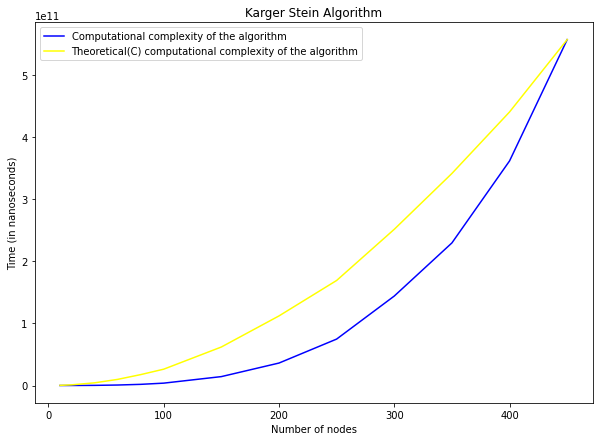

In [7]:
reference = []
for i in range(df_karger_new.shape[0]):
  reference = [round(2075876.211782 * float(df_karger_new.iloc[i]['mean_edges']) * float(df_karger_new.iloc[i]['n_vertices']), 6) for i in range(df_karger_new.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_karger_new['n_vertices'], df_karger_new['time'],color='blue', label='Computational complexity of the algorithm')
ax.plot(df_karger_new['n_vertices'], reference,color='yellow', label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Karger Stein Algorithm')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('Karger_Stein.png')
plt.show()

### **Executing Stoer Wagner Algorithm**

In [8]:
df = pan.read_csv('output_stoerwagner.csv',header=None)

In [9]:
df_stoerwagner=df
df_stoerwagner.columns = ['dataset','n_vertices', 'n_edges', 'time', 'time_in_s', 'result','rep_time'] # Add Column Headings

df_stoerwagner.drop(['dataset'], inplace=True, axis=1) # Remove the custom Index
#print(df_karger)
print(df_stoerwagner)

    n_vertices  n_edges          time  time_in_s  result  rep_time
0           10       14  2.030945e+06   0.002031    3056       460
1           10       10  1.188435e+06   0.001188     223       682
2           10       12  1.118221e+06   0.001118    2302       638
3           10       11  1.011847e+06   0.001012    4974       871
4           20       24  2.889937e+06   0.002890    1526       181
5           20       24  4.522151e+06   0.004522    1684       354
6           20       27  9.477301e+06   0.009477     522       152
7           20       25  1.017284e+07   0.010173    2866       207
8           40       52  2.071335e+07   0.020713    2137        44
9           40       54  1.449121e+07   0.014491    1446        88
10          40       51  1.419322e+07   0.014193     648        63
11          40       50  1.414585e+07   0.014146    2486        86
12          60       82  2.970786e+07   0.029708    1282        32
13          60       72  2.982973e+07   0.029830     299      

In [10]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_stoerwagner_new = pan.DataFrame()

for index, row in df_stoerwagner.iterrows():
  
  if current_n_vertices == 0: #Run at init
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']: #for next graph which is non repetative
    df_stoerwagner_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_stoerwagner_new = pan.concat([df_stoerwagner_new, df_stoerwagner_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_stoerwagner_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_stoerwagner_new = pan.concat([df_stoerwagner_new, df_stoerwagner_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_stoerwagner_new

,n_vertices,mean_edges,time
0,10,11.75,1.337362e+06
1,20,25.00,6.765557e+06
2,40,51.75,1.588591e+07
3,60,79.00,3.070528e+07
4,80,105.50,4.341735e+07
5,100,126.50,6.055353e+07
6,150,199.00,1.521316e+08
7,200,269.75,2.889854e+08
8,250,325.75,4.483808e+08
9,300,403.75,6.848084e+08


In [11]:
ratios = [None] + [round(df_stoerwagner_new.iloc[i + 1]['time'] / df_stoerwagner_new.iloc[i]['time'], 6) for i in range((df_stoerwagner_new.shape[0] - 1))]
ratios

[None,
 5.058882,
 2.348056,
 1.932863,
 1.414002,
 1.394685,
 2.512348,
 1.899576,
 1.551569,
 1.527292,
 1.43694,
 1.28777,
 1.355361]

In [12]:
c_estimates = [round(df_stoerwagner_new.iloc[i]['time'] / (float(df_stoerwagner_new.iloc[i]['mean_edges']) * math.log(float(df_stoerwagner_new.iloc[i]['n_vertices']), 2)), 6) for i in range(df_stoerwagner_new.shape[0])]
c_estimates

[34262.649244,
 62616.098979,
 57680.976626,
 65800.183391,
 65097.042256,
 72049.129373,
 105754.518571,
 140152.852406,
 172796.132318,
 206119.50072,
 247868.810372,
 276476.177777,
 326958.282248]

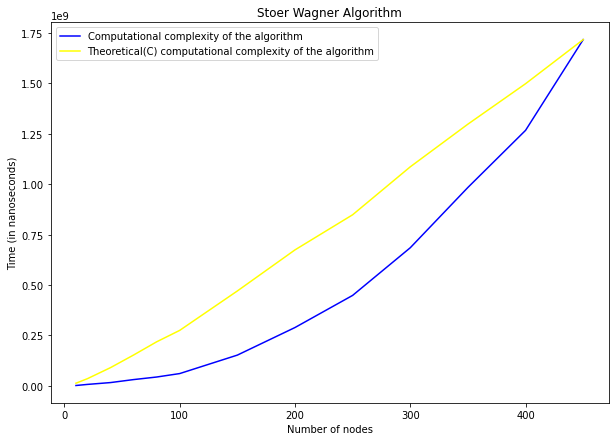

In [13]:
reference = []
for i in range(df_stoerwagner_new.shape[0]):
  reference = [round(326958.282248 * float(df_stoerwagner_new.iloc[i]['mean_edges']) * math.log(float(df_stoerwagner_new.iloc[i]['n_vertices']), 2), 6) for i in range(df_stoerwagner_new.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_stoerwagner_new['n_vertices'],df_stoerwagner_new['time'],color='blue', label='Computational complexity of the algorithm')
ax.plot(df_stoerwagner_new['n_vertices'], reference,color='yellow', label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Stoer Wagner Algorithm')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('stoer_wagner.png')
plt.show()

### **Comparing: Karger Stein Algorithm vs Stoer Wagner Algorithm**

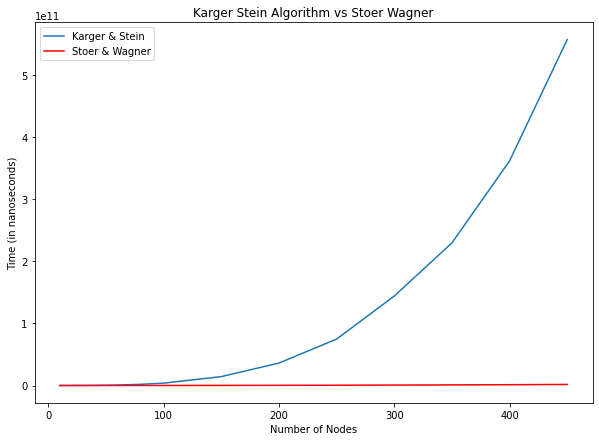

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_karger_new['n_vertices'], df_karger_new['time'], label='Karger & Stein')
ax.plot(df_stoerwagner_new['n_vertices'], df_stoerwagner_new['time'], color='red', label='Stoer & Wagner')
ax.set_title('Karger Stein Algorithm vs Stoer Wagner')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('KargerStein_StoerWagner.png')
plt.show()